# Hold out method

In [4]:
import pandas as pd 
import numpy as np

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") # to avoid warnings

Let's import the iris data which will be our first object of study create an object data that contains the explanatory variables and an object target that contains the target variable.

In [5]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns = [a.split(" (")[0].replace(" ","_") for a in iris.feature_names])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target = pd.DataFrame(iris.target, columns=["species"])
target.head()

,species
0,0
1,0
2,0
3,0
4,0


Split the data between a train set and a test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target
)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
90,5.5,2.6,4.4,1.2
44,5.1,3.8,1.9,0.4
53,5.5,2.3,4.0,1.3
3,4.6,3.1,1.5,0.2
61,5.9,3.0,4.2,1.5


Plot the distribution of the first two variables for the full data set, the train set, and the test set, do you notice any differences? what does it mean for the evaluation of our model ?

In [8]:
fig = px.density_contour(data, 'sepal_width', 'sepal_length', title = 'Full dataset')
fig.show()
fig = px.density_contour(X_train, 'sepal_width', 'sepal_length', title = 'Train set')
fig.show()
fig = px.density_contour(X_test, 'sepal_width', 'sepal_length', title = 'Test set')
fig.show()

Normalize the data (it is already very clean so there is no need to do other preprocessings)

In [9]:
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

What is the baseline (dummy model) for this model? Calculate the accuracy for this baseline model.

In [10]:
# Prédire toujours la catégorie la plus fréquente
baseline_pred = y_train.value_counts().index[0]  # Catégorie la plus fréquente

# Calcul du score du modèle baseline
baseline_accuracy = (target == baseline_pred).mean()

# Affichage du score
print(f"The general score for the baseline model is: {baseline_accuracy:}")

The general score for the baseline model is: species    0.333333
dtype: float64


Create an instance of a SVM model with a linear kernel, calculate the resubstitution score and hold out score for this model. What can you say about the bias for each of these evaluation metrics?

In [11]:
# Initialisation et entraînement du modèle
svc = SVC(kernel="linear")
svc.fit(X_train_norm, y_train)

# Calcul des scores
resubstitution_score = svc.score(X_train_norm, y_train)  # Score sur l'ensemble d'entraînement
holdout_score = svc.score(X_test_norm, y_test)  # Score sur l'ensemble de test

# Affichage des résultats
print(f"The resubstitution score for the SVC linear model is: {resubstitution_score:.4f}")
print(f"The hold-out score for the SVC linear model is: {holdout_score:.4f}")

The resubstitution score for the SVC linear model is: 0.9643
The hold-out score for the SVC linear model is: 0.9737


Look at the distribution of the target variable in the full dataset, the train set and the test set. Are they identically distributed?

In [12]:
# Calcul des distributions pour le jeu de données complet, d'entraînement et de test
full_distribution = target.value_counts() / len(target)
train_distribution = y_train.value_counts() / len(y_train)
test_distribution = y_test.value_counts() / len(y_test)

# Affichage des résultats avec f-strings
print(f"The distribution for the target on the full dataset is:\n{full_distribution}")
print(f"\nThe distribution for the target on the train set is:\n{train_distribution}")
print(f"\nThe distribution for the target on the test set is:\n{test_distribution}")

The distribution for the target on the full dataset is:
species
0          0.333333
1          0.333333
2          0.333333
Name: count, dtype: float64

The distribution for the target on the train set is:
species
0          0.357143
1          0.330357
2          0.312500
Name: count, dtype: float64

The distribution for the target on the test set is:
species
2          0.394737
1          0.342105
0          0.263158
Name: count, dtype: float64


Perform a new train test split and this time make sure that the target variable's distribution is preserved.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    stratify=target
)

sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

# Calcul des distributions pour le jeu de données complet, d'entraînement et de test
full_distribution = target.value_counts() / len(target)
train_distribution = y_train.value_counts() / len(y_train)
test_distribution = y_test.value_counts() / len(y_test)

# Affichage des résultats avec f-strings
print(f"The distribution for the target on the full dataset is:\n{full_distribution}")
print(f"\nThe distribution for the target on the train set is:\n{train_distribution}")
print(f"\nThe distribution for the target on the test set is:\n{test_distribution}")

The distribution for the target on the full dataset is:
species
0          0.333333
1          0.333333
2          0.333333
Name: count, dtype: float64

The distribution for the target on the train set is:
species
0          0.339286
1          0.330357
2          0.330357
Name: count, dtype: float64

The distribution for the target on the test set is:
species
1          0.342105
2          0.342105
0          0.315789
Name: count, dtype: float64


What was the influence of this operation on the distribution of the explanatory variables?

In [14]:
fig = px.density_contour(data, 'sepal_width', 'sepal_length', title = 'Full dataset')
fig.show()
fig = px.density_contour(X_train, 'sepal_width', 'sepal_length', title = 'Train set')
fig.show()
fig = px.density_contour(X_test, 'sepal_width', 'sepal_length', title = 'Test set')
fig.show()

Calculate the new resubstitution score and holdout score for the new stratified split. What is the influence of stratifying data on the bias of each evaluation metric?

In [15]:
# Initialisation et entraînement du modèle
svc = SVC(kernel="linear")
svc.fit(X_train_norm, y_train)

# Calcul des scores
resubstitution_score = svc.score(X_train_norm, y_train)  # Score sur l'ensemble d'entraînement
holdout_score = svc.score(X_test_norm, y_test)  # Score sur l'ensemble de test

# Affichage des résultats
print(f"The resubstitution score for the SVC linear model is: {resubstitution_score:.4f}")
print(f"The hold-out score for the SVC linear model is: {holdout_score:.4f}")

The resubstitution score for the SVC linear model is: 0.9643
The hold-out score for the SVC linear model is: 1.0000


Create a loop that will repeat 100 times the hold out method for the non-stratified and the stratified splits respectively, then calculate the average score in both cases, the standard deviation and the 95% confidence intervals. Plot the resusbstitution and hold out score distribution for both cases, what can you conclude ?

Stratified Split Results:
Resubstitution (Stratified):
  - Mean: 0.9762
  - Standard Deviation: 0.0088
  - 95% Confidence Interval: [0.9583, 0.9917]

Hold-out (Stratified):
  - Mean: 0.9653
  - Standard Deviation: 0.0298
  - 95% Confidence Interval: [0.9000, 1.0000]

Non-Stratified Split Results:
Resubstitution (Non-Stratified):
  - Mean: 0.9775
  - Standard Deviation: 0.0092
  - 95% Confidence Interval: [0.9583, 0.9917]

Hold-out (Non-Stratified):
  - Mean: 0.9603
  - Standard Deviation: 0.0322
  - 95% Confidence Interval: [0.9000, 1.0000]



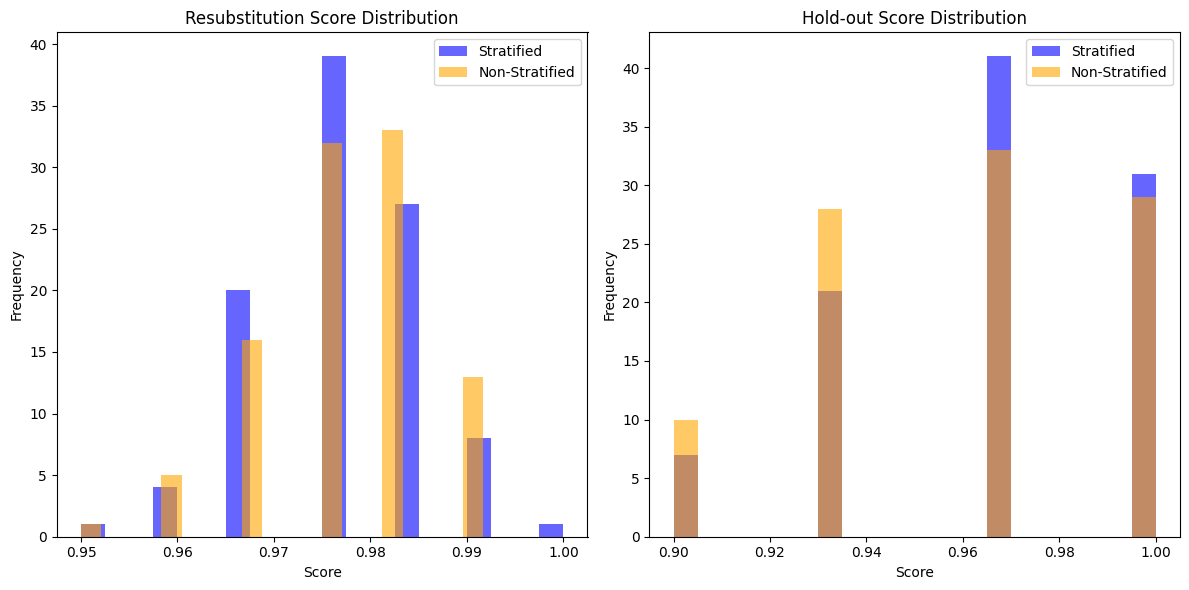

In [16]:
# Initialize score lists
re_score_stratify = [] # scores de resubstitution pour les splits stratifiés.
ho_score_stratify = [] # scores de hold-out pour les splits stratifiés.
re_score_non_stratify = [] # scores de resubstitution (accuracy sur l’ensemble d’entraînement) pour les splits non stratifiés.
ho_score_non_stratify = [] # scores de hold-out (accuracy sur l’ensemble de test) pour les splits non stratifiés

# Stratified split
for _ in range(100): # Effectue 100 itérations # "_" est utilisé comme variable de boucle lorsqu’on n’a pas besoin de la valeur de l’itération.
    X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target, test_size=0.2)
    sc = StandardScaler()
    X_train_norm = sc.fit_transform(X_train)
    X_test_norm = sc.transform(X_test)

    svc = SVC(kernel="linear")
    svc.fit(X_train_norm, y_train)

    re_score_stratify.append(svc.score(X_train_norm, y_train))
    ho_score_stratify.append(svc.score(X_test_norm, y_test))

# Non-stratified split
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
    sc = StandardScaler()
    X_train_norm = sc.fit_transform(X_train)
    X_test_norm = sc.transform(X_test)

    svc = SVC(kernel="linear")
    svc.fit(X_train_norm, y_train)

    re_score_non_stratify.append(svc.score(X_train_norm, y_train))
    ho_score_non_stratify.append(svc.score(X_test_norm, y_test))

# Helper function to calculate statistics and confidence intervals - calculer des statistiques descriptives pour une liste de scores et d’afficher les résultats sous une forme lisible.
def calculate_stats(scores, name):
    mean = np.mean(scores)
    std_dev = np.std(scores)
    ci_lower = np.quantile(scores, 0.025) # borne inférieure de l’intervalle de confiance à 95 %
    ci_upper = np.quantile(scores, 0.975) # borne supérieure de l’intervalle de confiance à 95 %
    print(f"{name}:\n"
          f"  - Mean: {mean:.4f}\n"
          f"  - Standard Deviation: {std_dev:.4f}\n"
          f"  - 95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]\n")
    return mean, std_dev, ci_lower, ci_upper

# Calculate stats for both cases
print("Stratified Split Results:")
re_mean_stratify, re_std_stratify, re_ci_low_stratify, re_ci_high_stratify = calculate_stats(re_score_stratify, "Resubstitution (Stratified)")
ho_mean_stratify, ho_std_stratify, ho_ci_low_stratify, ho_ci_high_stratify = calculate_stats(ho_score_stratify, "Hold-out (Stratified)")

print("Non-Stratified Split Results:")
re_mean_non_stratify, re_std_non_stratify, re_ci_low_non_stratify, re_ci_high_non_stratify = calculate_stats(re_score_non_stratify, "Resubstitution (Non-Stratified)")
ho_mean_non_stratify, ho_std_non_stratify, ho_ci_low_non_stratify, ho_ci_high_non_stratify = calculate_stats(ho_score_non_stratify, "Hold-out (Non-Stratified)")

# Plot score distributions
plt.figure(figsize=(12, 6))

# Resubstitution scores
plt.subplot(1, 2, 1)
plt.hist(re_score_stratify, alpha=0.6, bins=20, label="Stratified", color="blue")
plt.hist(re_score_non_stratify, alpha=0.6, bins=20, label="Non-Stratified", color="orange")
plt.title("Resubstitution Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

# Hold-out scores
plt.subplot(1, 2, 2)
plt.hist(ho_score_stratify, alpha=0.6, bins=20, label="Stratified", color="blue")
plt.hist(ho_score_non_stratify, alpha=0.6, bins=20, label="Non-Stratified", color="orange")
plt.title("Hold-out Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Bootstrap Method

This section of the exercise will keep using the iris dataset and implement the bootstrap evaluation techniques that were introduced in the lecture

First let's use the sklearn.utils.resample function to create 100 bootstrap samples (don't forget to also generate the out of bag samples)

In [17]:
# Initialisation des listes pour stocker les échantillons bootstrap et out-of-bag (OOB)
bootstrap_samples = []
oob_samples = []
bootstrap_targets = []
oob_targets = []

# Boucle pour générer 100 échantillons bootstrap
for _ in range(100): # 100 échantillons bootstrap à partir des données d’entrée (data et target) et stocke les échantillons associés ainsi que les données “Out-of-Bag” (OOB) dans des listes séparées.
    # Générer un échantillon bootstrap
    sample, sample_target = resample( # resample = générer un échantillon bootstrap
        data, 
        target, 
        replace=True, # échantillonnage se fait avec remise
        n_samples=len(data), # contiendra le même nombre d’observations que l’ensemble original
        stratify=target
    )
    # Indices des données bootstrap
    sample_index = sample.index # Récupère les indices des observations dans l’échantillon bootstrap, utilisés pour identifier les données qui n’ont pas été sélectionnées.
    
    # Générer les données OOB
    oob_sample = data.loc[~data.index.isin(sample_index)]
    oob_target = target.loc[~target.index.isin(sample_index)]
    
    # Stocker les échantillons bootstrap et OOB
    bootstrap_samples.append(sample)
    oob_samples.append(oob_sample)
    bootstrap_targets.append(sample_target)
    oob_targets.append(oob_target)

# Affichage des premiers résultats
print("First bootstrap sample:")
display(bootstrap_samples[0])

print("First out-of-bag sample:")
display(oob_samples[0])

print("First bootstrap sample target:")
display(bootstrap_targets[0])

print("First out-of-bag sample target:")
display(oob_targets[0])

First bootstrap sample:


,sepal_length,sepal_width,petal_length,petal_width
115,6.4,3.2,5.3,2.3
78,6.0,2.9,4.5,1.5
142,5.8,2.7,5.1,1.9
6,4.6,3.4,1.4,0.3
13,4.3,3.0,1.1,0.1
...,...,...,...,...
53,5.5,2.3,4.0,1.3
31,5.4,3.4,1.5,0.4
120,6.9,3.2,5.7,2.3
32,5.2,4.1,1.5,0.1


First out-of-bag sample:


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
3,4.6,3.1,1.5,0.2
7,5.0,3.4,1.5,0.2
9,4.9,3.1,1.5,0.1
10,5.4,3.7,1.5,0.2
11,4.8,3.4,1.6,0.2
16,5.4,3.9,1.3,0.4
18,5.7,3.8,1.7,0.3
19,5.1,3.8,1.5,0.3
20,5.4,3.4,1.7,0.2


First bootstrap sample target:


,species
115,2
78,1
142,2
6,0
13,0
...,...
53,1
31,0
120,2
32,0


First out-of-bag sample target:


,species
0,0
3,0
7,0
9,0
10,0
11,0
16,0
18,0
19,0
20,0


Let's normalize each couple of bootstrap and out of bag samples

In [18]:
# Normalisation des échantillons bootstrap et OOB
bootstrap_samples_norm = []
oob_samples_norm = []

scaler = StandardScaler()

# Normalisation des échantillons bootstrap et OOB
for bootstrap_sample, oob_sample in zip(bootstrap_samples, oob_samples):
    # Normaliser l'échantillon bootstrap
    bootstrap_normalized = scaler.fit_transform(bootstrap_sample)
    # Appliquer la transformation OOB avec les statistiques de l'échantillon bootstrap
    oob_normalized = scaler.transform(oob_sample)
    
    # Ajouter les échantillons normalisés aux listes
    bootstrap_samples_norm.append(bootstrap_normalized)
    oob_samples_norm.append(oob_normalized)

# Affichage des premiers résultats
print("First normalized bootstrap sample:")
print(bootstrap_samples_norm[0])

print("\nFirst normalized out-of-bag sample:")
print(oob_samples_norm[0])

First normalized bootstrap sample:
[[ 0.66385685  0.29473686  0.86531641  1.38777224]
 [ 0.16905671 -0.37511964  0.41068432  0.35597132]
 [-0.07834336 -0.82169063  0.75165839  0.87187178]
 [-1.56274377  0.74130785 -1.35101503 -1.19173007]
 [-1.93384387 -0.15183414 -1.52150206 -1.4496803 ]
 [ 0.16905671 -1.93811812  0.69482938  0.35597132]
 [ 2.2719573  -0.15183414  1.3199485   1.38777224]
 [ 0.16905671  0.74130785  0.41068432  0.48494643]
 [ 0.04535668 -0.15183414  0.24019729  0.35597132]
 [ 0.16905671 -0.37511964  0.41068432  0.35597132]
 [ 0.16905671  0.74130785  0.41068432  0.48494643]
 [ 0.29275675 -0.37511964  0.52434234  0.2269962 ]
 [-1.19164366 -1.49154713 -0.27126381 -0.28890426]
 [ 1.90085719 -0.59840513  1.3199485   0.87187178]
 [-1.43904373  0.29473686 -1.40784404 -1.32070518]
 [-0.20204339  2.97416283 -1.29418601 -1.06275495]
 [-0.9442436   1.63444984 -1.06686997 -1.06275495]
 [ 0.29275675 -0.37511964  0.52434234  0.2269962 ]
 [-0.82054356  0.74130785 -1.35101503 -1.320705

Let's now train the svc linear model on our bootstrap samples, create a list of resubstitution scores on the bootstrap samples and a list of out of bag scores. And plot the distributions of both scores, what do you think? is it coherent with the lecture ?

In [28]:
# Initialize empty lists to store bootstrap and out-of-bag scores
bs_score = []
oob_score = []

# Create the SVC model with a linear kernel
svc = SVC(kernel="linear")

# Fit the model and calculate scores for bootstrap and out-of-bag data
for b, o, b_t, o_t in zip(bootstrap_samples_norm, oob_samples_norm, bootstrap_targets, oob_targets):
    svc.fit(b, b_t)
    bs_score.append(svc.score(b, b_t))  # Bootstrap score
    oob_score.append(svc.score(o, o_t))  # Out-of-bag score

# Visualize the bootstrap and out-of-bag scores with histograms
fig_bs = px.histogram(bs_score, title="Bootstrap Scores", nbins=10)
fig_bs.show()

fig_oob = px.histogram(oob_score, title="Out-of-Bag Scores", nbins=10)
fig_oob.show()

it is entirely coherent with the lecture, booststrap scores are extremely optimistically biased so very high and concentrated whereas the out of bag scores are pessimistically biased and more unstable because they rely on smaller subsamples of the dataset which brings more variability

Calculate the boostrap accuracy using the following formula from the lecture :

In [29]:
# Calcul des scores bootstrap
acc_bootstrap = 0.632 * np.array(oob_score) + 0.368 * np.array(bs_score)

# Calcul des statistiques
average = acc_bootstrap.mean()
std_dev = acc_bootstrap.std()
conf_interval_low = np.quantile(acc_bootstrap, 0.025)
conf_interval_high = np.quantile(acc_bootstrap, 0.975)

# Affichage des résultats
print(
    f"The bootstrap score gives the following results:\n"
    f"- Average: {average:.4f}\n"
    f"- Standard Deviation: {std_dev:.4f}\n"
    f"- 95% Confidence Interval: [{conf_interval_low:.4f}, {conf_interval_high:.4f}]"
)

The bootstrap score gives the following results:
- Average: 0.9695
- Standard Deviation: 0.0135
- 95% Confidence Interval: [0.9412, 0.9926]


The boostrap evaluation method seems to give a more precise value for the general score.